In [2]:
import os
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import cv2
import numpy as np
import pytorch_lightning as pl
from torch.utils.data import DataLoader
import torchvision
from torchvision import transforms as transforms
import importlib
import torchmetrics
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from PIL import Image

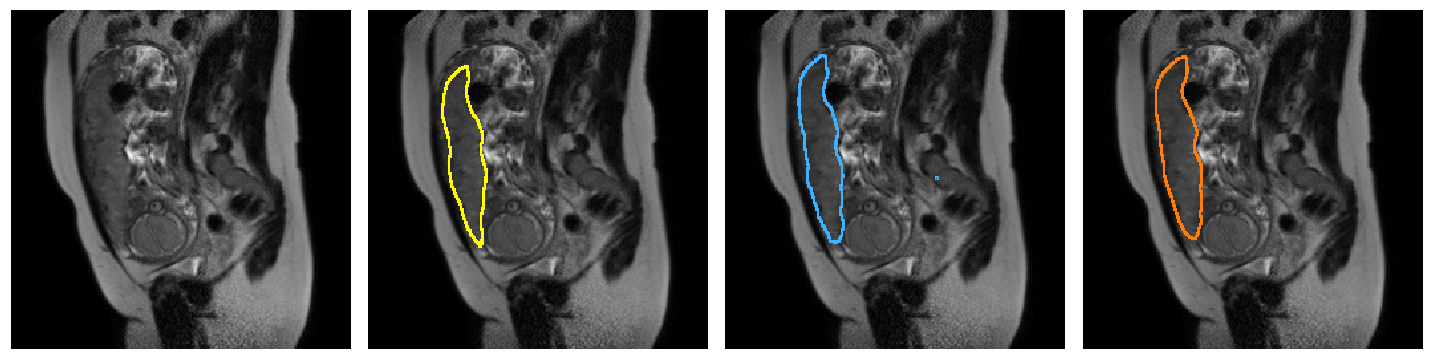

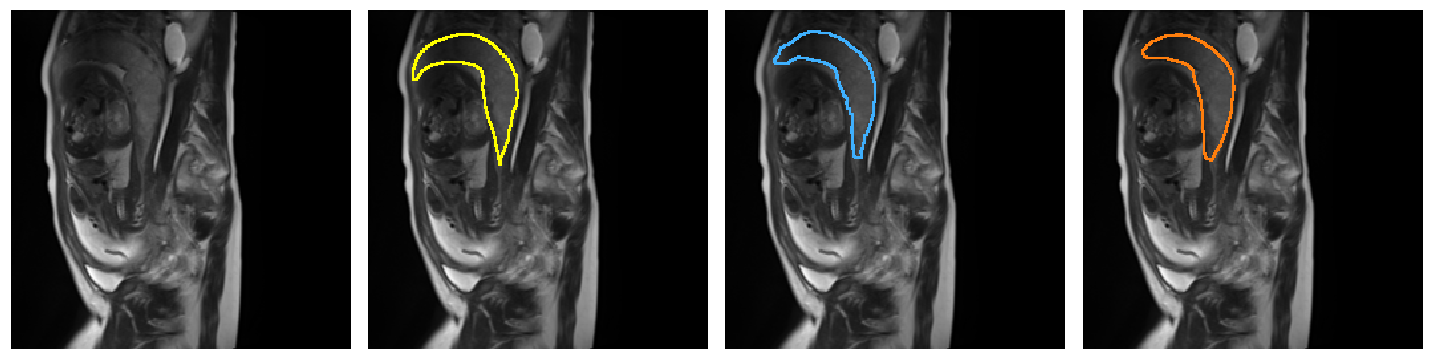

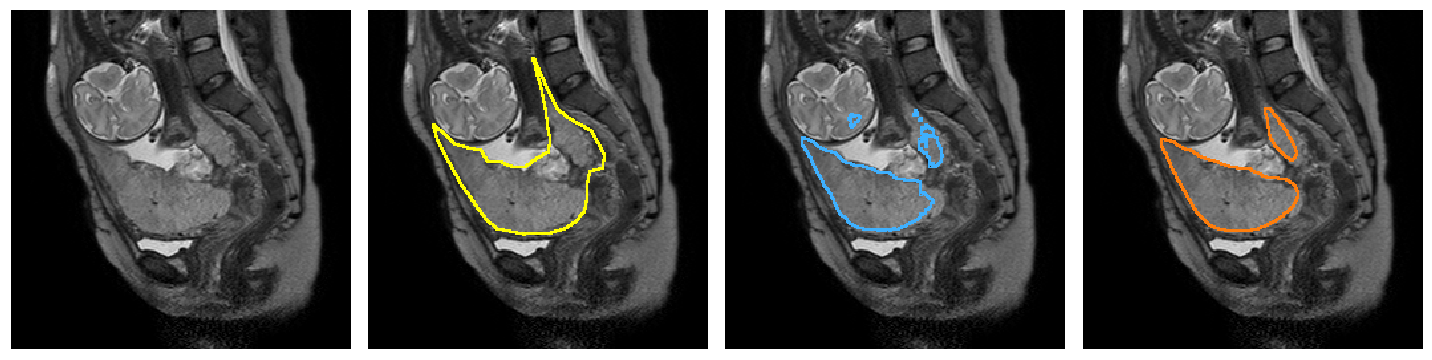

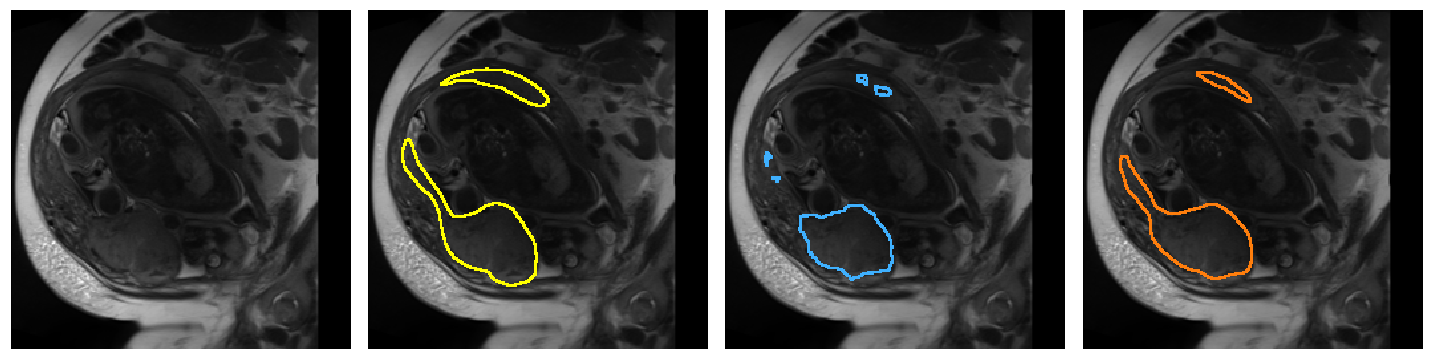

In [3]:
def EDGE(a, b, cp):
    c = torch.zeros([3, 256, 256])
    c[0,:,:] = cp[0]
    c[1,:,:] = cp[1]
    c[2,:,:] = cp[2]
    c = torchvision.transforms.functional.to_pil_image(c)

    H = 256
    W = 256

#     tf0= transforms.Pad(padding=(1,1,0,0))
#     tf1= transforms.Pad(padding=(0,1,1,0))
#     tf2= transforms.Pad(padding=(0,0,1,1))
#     tf3= transforms.Pad(padding=(1,0,0,1))

#     b0= tf0(b)
#     b1= tf1(b)
#     b2= tf2(b)
#     b3= tf3(b)

    tf = transforms.Pad(padding=(2,2,2,2))
    b = tf(b)
    b0 = torchvision.transforms.functional.crop(b,1,1,258,258)
    b1 = torchvision.transforms.functional.crop(b,1,2,258,258)
    b2 = torchvision.transforms.functional.crop(b,1,3,258,258)
    b3 = torchvision.transforms.functional.crop(b,2,3,258,258)
    b4 = torchvision.transforms.functional.crop(b,3,3,258,258)
    b5 = torchvision.transforms.functional.crop(b,3,2,258,258)
    b6 = torchvision.transforms.functional.crop(b,3,1,258,258)
    b7 = torchvision.transforms.functional.crop(b,2,1,258,258)
    b8 = torchvision.transforms.functional.crop(b,1,1,258,258)


#     b_all = torch.cat((b0, b1, b2, b3), 0)
#     b_all = torch.sum(input=b_all, dim=0)
#     b_all = ((b_all == 2)|(b_all == 3))
#     b_all = ~b_all
#     b_all = b_all*torch.ones([257,257])

    b_all = torch.cat((b0, b1, b2, b3, b4, b5, b6, b7, b8), 0)
    b_all = torch.sum(input=b_all, dim=0)
    b_all = ((b_all == 1)|(b_all == 2)|(b_all == 3)|(b_all == 4)|(b_all == 5)|(b_all == 6)|(b_all == 7)|(b_all == 8))
    b_all = ~b_all
    b_all = b_all*torch.ones([258,258])

    a = torchvision.transforms.functional.to_pil_image(a, 'F')
    b_all = torchvision.transforms.functional.to_pil_image(b_all)
    transform = transforms.CenterCrop((H,W))

    b_all = transform(b_all)
    c.convert("RGB")

    im = Image.composite(a,c, b_all)
    im = torchvision.transforms.functional.to_tensor(im)
    return im

import matplotlib.pyplot as plt
import torch

for a in range(215):
    if (a==17)|(a==33)|(a==47)|(a==127):
        b = a // 5
        c = a % 5
        fig = plt.figure(figsize=(20,20))

        x3 = torch.load("Result/step2/PlaNet_S_A_only_withoutTTA/"+str(a)+"_r", map_location=torch.device('cpu'))
        plt.subplot(1, 4, 1)
    #     plt.title("Raw", fontweight="bold", fontsize=30)
        plt.gca().spines['right'].set_visible(False)
        plt.gca().spines['top'].set_visible(False)
        plt.gca().spines['bottom'].set_visible(False)
        plt.gca().spines['left'].set_visible(False)
        plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False, bottom=False, left=False, right=False, top=False)        
        plt.imshow(x3.cpu().squeeze().detach().numpy(), cmap='gray')

        x0 = torch.load("Result/step2/PlaNet_S_A_only_withoutTTA/"+str(a)+"_t", map_location=torch.device('cpu'))
    #     plt.subplot(1, 7, 2)
    # #     plt.title("Ground-truth", fontweight="bold", fontsize=30)
    #     plt.gca().spines['right'].set_visible(False)
    #     plt.gca().spines['top'].set_visible(False)
    #     plt.gca().spines['bottom'].set_visible(False)
    #     plt.gca().spines['left'].set_visible(False)
    #     plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False, bottom=False, left=False, right=False, top=False)    
    #     plt.imshow(x0.cpu().squeeze().detach().numpy(), cmap='gray')
    #     
        x1 = torch.load("Result/step2/PlaNet_S_A_only_withoutTTA/"+str(a)+"_p0", map_location=torch.device('cpu'))
    #     plt.subplot(1, 7, 4)
    # #     plt.title("U-Net", fontweight="bold", fontsize=30)
    #     plt.gca().spines['right'].set_visible(False)
    #     plt.gca().spines['top'].set_visible(False)
    #     plt.gca().spines['bottom'].set_visible(False)
    #     plt.gca().spines['left'].set_visible(False)
    #     plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False, bottom=False, left=False, right=False, top=False)        
    #     plt.imshow(x1.cpu().squeeze().detach().numpy(), cmap='gray')

        x2 = torch.load("Result/step2/PlaNet_S_A_plus_B/"+str(a)+"_pAplusB", map_location=torch.device('cpu'))
    #     plt.subplot(1, 7, 6)
    # #     plt.title("PlaNet-S", fontweight="bold", fontsize=30)
    #     plt.gca().spines['right'].set_visible(False)
    #     plt.gca().spines['top'].set_visible(False)
    #     plt.gca().spines['bottom'].set_visible(False)
    #     plt.gca().spines['left'].set_visible(False)
    #     plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False, bottom=False, left=False, right=False, top=False)        
    #     plt.imshow(x2.cpu().squeeze().detach().numpy(), cmap='gray')


        cp = [256/256,256/256,0/256]
        im = EDGE(x3, x0.cpu().unsqueeze(0), cp)
        plt.subplot(1, 4, 2)
        plt.gca().spines['right'].set_visible(False)
        plt.gca().spines['top'].set_visible(False)
        plt.gca().spines['bottom'].set_visible(False)
        plt.gca().spines['left'].set_visible(False)
        plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False, bottom=False, left=False, right=False, top=False)        
        plt.imshow(im.permute(1, 2, 0).cpu().squeeze().detach().numpy(), cmap='gray')  

        cp = [64/256,177/256,255/256]
        im = EDGE(x3, x1.cpu().unsqueeze(0), cp)
        plt.subplot(1, 4, 3)
        plt.gca().spines['right'].set_visible(False)
        plt.gca().spines['top'].set_visible(False)
        plt.gca().spines['bottom'].set_visible(False)
        plt.gca().spines['left'].set_visible(False)
        plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False, bottom=False, left=False, right=False, top=False)        
        plt.imshow(im.permute(1, 2, 0).cpu().squeeze().detach().numpy(), cmap='gray')

        cp = [255/256,127/256,14/256]
        im = EDGE(x3, x2.cpu().unsqueeze(0), cp)
        plt.subplot(1, 4, 4)
        plt.gca().spines['right'].set_visible(False)
        plt.gca().spines['top'].set_visible(False)
        plt.gca().spines['bottom'].set_visible(False)
        plt.gca().spines['left'].set_visible(False)
        plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False, bottom=False, left=False, right=False, top=False)        
        plt.imshow(im.permute(1, 2, 0).cpu().squeeze().detach().numpy(), cmap='gray')
        plt.tight_layout()
        plt.savefig("Result/step4/Examples/"+str(b)+"_"+str(c)+".png")
    #     plt.close(fig)
    else: pass
    plt.show()

# IoUの評価
## IoUの数値

In [3]:
import pandas as pd
import tabulate
stats = pd.DataFrame({
    'All': [torch.load("Result/step3/PlaNet_S_A_only_withoutTTA/iou_mean").cpu().detach().numpy(), torch.load("Result/step3/PlaNet_S_A_plus_B/iou_mean").cpu().detach().numpy()]
}, index=['U-Net IoU mean', 'PlaNet-S IoU mean'])

print(tabulate(stats, headers='keys', tablefmt='psql'))

TypeError: 'module' object is not callable

## IoU histogram

215 215


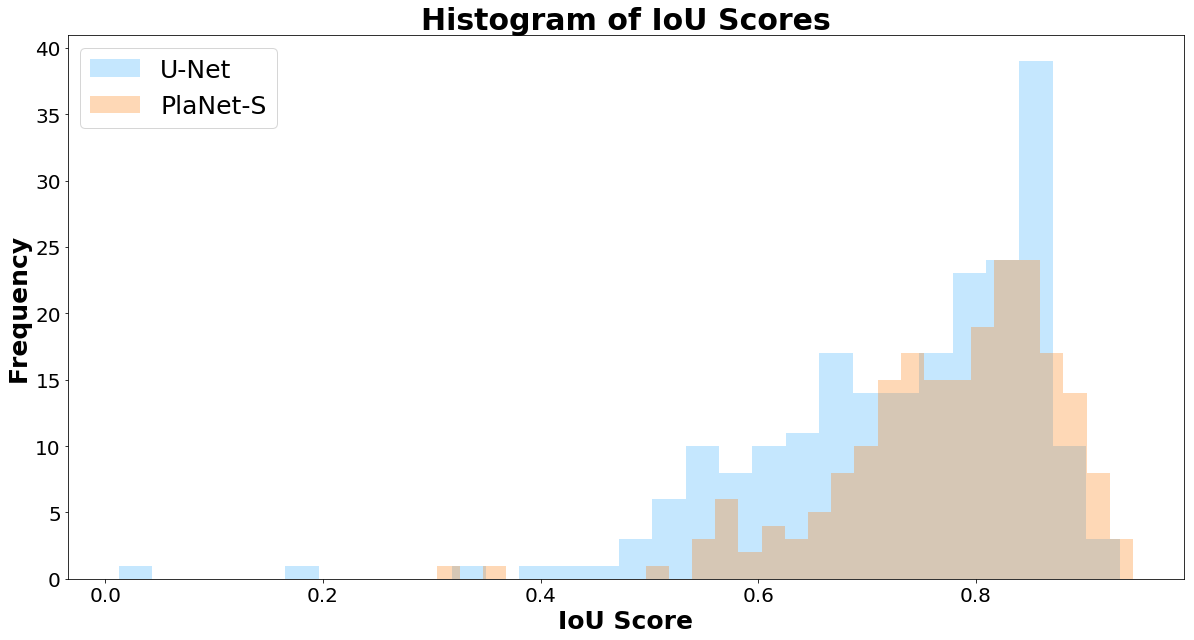

In [4]:
# import matplotlib.pyplot as plt

# データ
iou1 = torch.load("Result/step3/PlaNet_S_A_only_withoutTTA/iou_cases")
iou2= torch.load("Result/step3/PlaNet_S_A_plus_B/iou_cases")

print(len(iou1), len(iou2))
# ヒストグラムの作成
plt.figure(figsize=(20,10))
plt.hist(iou1, bins=30, color=[64/256, 177/256,255/256], alpha=0.3, label='U-Net')
plt.hist(iou2, bins=30, color=[255/256, 127/256,14/256], alpha=0.3, label='PlaNet-S')

# グラフのタイトルと軸ラベル
plt.title('Histogram of IoU Scores', fontweight="bold", fontsize=30)
plt.xlabel('IoU Score', fontweight="bold", fontsize=25)
plt.ylabel('Frequency', fontweight="bold", fontsize=25)
plt.tick_params(labelsize=20)
# レジェンドの表示
plt.legend(fontsize=25)
plt.savefig("Result/step4/IoU_histogram.png")
# グラフの表示

## IoU box plot

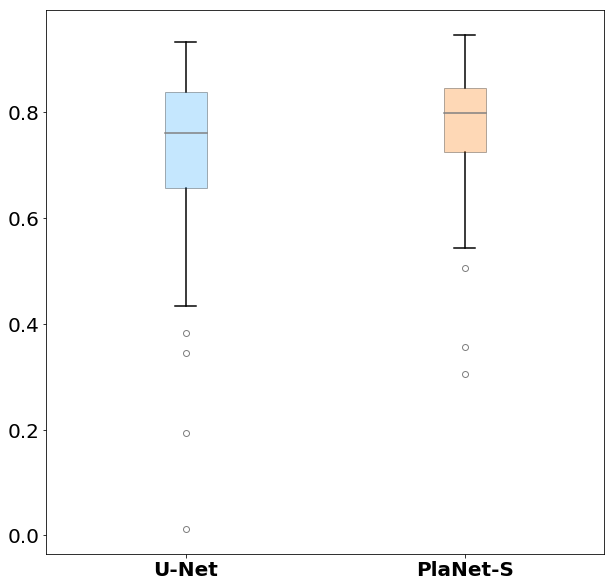

In [5]:
import matplotlib.pyplot as plt
import torch

iou1 = torch.load("Result/step3/PlaNet_S_A_only_withoutTTA/iou_cases")
iou2= torch.load("Result/step3/PlaNet_S_A_plus_B/iou_cases")

data_to_plot = [iou1, iou2]

# Create a figure instance
fig = plt.figure(figsize=(10,10))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot, patch_artist=True)

colors = [[64/256, 177/256,255/256], [255/256, 127/256,14/256]]

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.3)

# Changing color and line width of whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='k', linewidth = 1.5)

# Changing color and line width of caps
for cap in bp['caps']:
    cap.set(color ='k', linewidth = 1.5)

# Changing color and line width of medians
for median in bp['medians']:
    median.set(color ='gray', linewidth = 1.5)

# changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='o', color ='k', alpha = 0.5)
    
ax.set_xticklabels(['U-Net', 'PlaNet-S'], fontweight="bold", fontsize=30)
plt.tick_params(labelsize=20)
# Save the figure
fig.savefig("Result/step4/iou_boxplot.png", bbox_inches='tight')

## IoU diff histogram

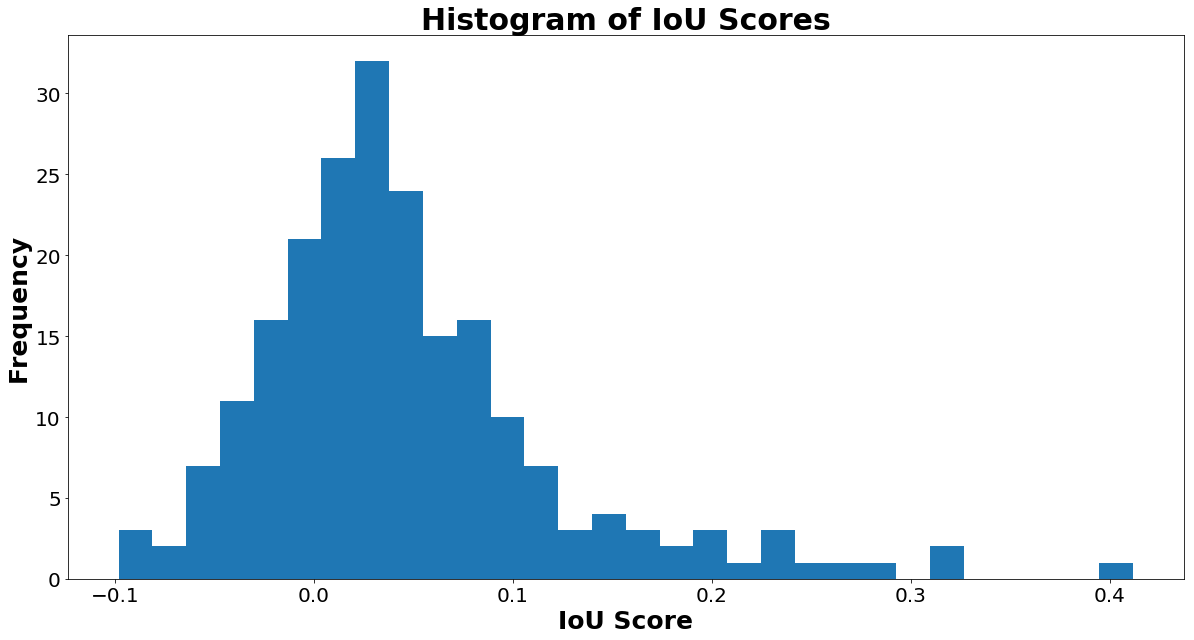

In [8]:
# import matplotlib.pyplot as plt

# データ
iou1 = torch.load("Result/step3/PlaNet_S_A_only_withoutTTA/iou_cases")
iou2= torch.load("Result/step3/PlaNet_S_A_plus_B/iou_cases")
diff = []
for i in range(215):
    d = iou2[i] - iou1[i]
    diff.append(d)
# ヒストグラムの作成
plt.figure(figsize=(20,10))
plt.hist(diff, bins=30)

# グラフのタイトルと軸ラベル
plt.title('Histogram of IoU Scores', fontweight="bold", fontsize=30)
plt.xlabel('IoU Score', fontweight="bold", fontsize=25)
plt.ylabel('Frequency', fontweight="bold", fontsize=25)
plt.tick_params(labelsize=20)
# レジェンドの表示
# plt.savefig("PlaNet/Step5_result/IoU_histogram.png")
# グラフの表示

## IoU statistics

In [10]:
import torch
import numpy as np
import pandas as pd
from tabulate import tabulate

# データのロード
iou1 = torch.load("Result/step3/PlaNet_S_A_only_withoutTTA/iou_cases")
iou2 = torch.load("Result/step3/PlaNet_S_A_plus_B/iou_cases")

# listをnumpy配列に変換
iou1_np = np.array(iou1)
iou2_np = np.array(iou2)

# 統計情報の計算
iou1_min = np.min(iou1_np)
iou1_max = np.max(iou1_np)
iou1_mean = np.mean(iou1_np)
iou1_median = np.median(iou1_np)
iou1_variance = np.var(iou1_np)
iou1_std = np.std(iou1_np)  # 標準偏差

iou2_min = np.min(iou2_np)
iou2_max = np.max(iou2_np)
iou2_mean = np.mean(iou2_np)
iou2_median = np.median(iou2_np)
iou2_variance = np.var(iou2_np)
iou2_std = np.std(iou2_np)  # 標準偏差

# 統計情報をデータフレームにまとめる
stats = pd.DataFrame({
    'Min': [iou1_min, iou2_min],
    'Max': [iou1_max, iou2_max],
    'Mean': [iou1_mean, iou2_mean],
    'Median': [iou1_median, iou2_median],
    'Variance': [iou1_variance, iou2_variance],
    'Std Dev': [iou1_std, iou2_std]  # 標準偏差を追加
}, index=['iou1', 'iou2'])

print(tabulate(stats, headers='keys', tablefmt='psql'))


+------+-----------+----------+----------+----------+------------+-----------+
|      |       Min |      Max |     Mean |   Median |   Variance |   Std Dev |
|------+-----------+----------+----------+----------+------------+-----------|
| iou1 | 0.0120773 | 0.932113 | 0.73106  | 0.759583 | 0.0174746  | 0.132191  |
| iou2 | 0.304348  | 0.944598 | 0.777181 | 0.797117 | 0.00990513 | 0.0995245 |
+------+-----------+----------+----------+----------+------------+-----------+


## IoU t-test

In [9]:
from scipy import stats
import numpy as np

# 対応のあるt検定
t_stat, p_val = stats.ttest_rel(iou1, iou2, alternative='less')

print(f"T-statistic: {t_stat}, P-value: {p_val}")

T-statistic: -8.853657539545093, P-value: 1.63097204085174e-16


# Connected Components
## bar plot

9


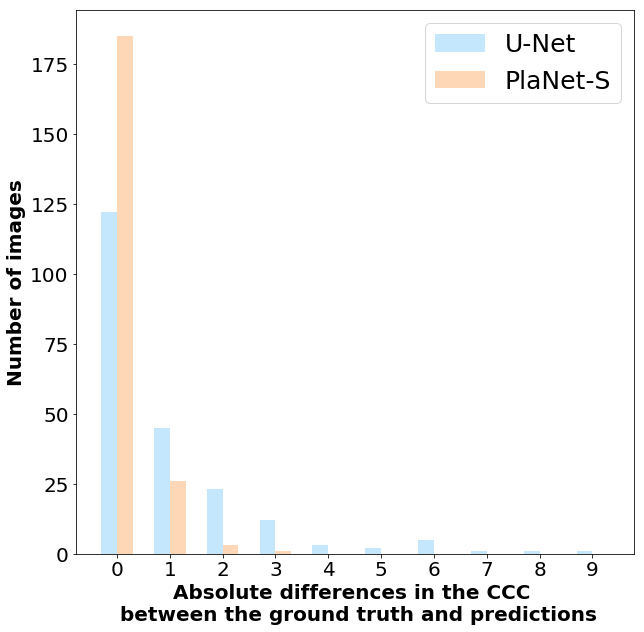

In [26]:
import cv2

'''
関数定義
'''

class Dataset(torch.utils.data.Dataset):
    def __init__(self, d):
        self.data = d
    def __len__(self):
        return len(self.data)
    def __getitem__(self, index):        
        img, cimg, mask, label, clinical_feature, ccc = self.data[index]
        return img, cimg, mask, label, clinical_feature, ccc
data_ft = torch.load('Data_tensor/ft')
Dataset_ft    = Dataset(d=data_ft)     
results_a = []
results_c = []
for a in range(215):
    x, cx, t_seg, t_cls, clinical_feature, ccc= Dataset_ft[a]
    x1 = torch.load("Result/step2/PlaNet_S_A_only_withoutTTA/"+str(a)+"_p0", map_location=torch.device('cpu')).cpu().squeeze().detach().numpy()
    segmentation_mask = (x1 * 255).astype(np.uint8)
    num_labels, labels_im, stats, centroids = cv2.connectedComponentsWithStats(segmentation_mask)
    num_components = num_labels - 1
    diff = np.abs(num_components - ccc)
    
    results_a.append(diff)
    

    x2 = torch.load("Result/step2/PlaNet_S_A_plus_B/"+str(a)+"_pAplusB", map_location=torch.device('cpu')).cpu().squeeze().detach().numpy()
    segmentation_mask = (x2 * 255).astype(np.uint8)
    num_labels, labels_im, stats, centroids = cv2.connectedComponentsWithStats(segmentation_mask)
    num_components = num_labels - 1
    diff = np.abs(num_components - ccc)
    results_c.append(diff)
    
# count_a_1 = results_a.count(1)
# count_a_2 = results_a.count(2)
# count_a_3 = results_a.count(3)
# count_c_1 = results_c.count(1)
# count_c_2 = results_c.count(2)
# count_c_3 = results_c.count(3)

m = max(max(results_a), max(results_c))
print(m)

# 出現回数を計算
counts_model1 = [results_a.count(i) for i in range(0, m+1)]
counts_model2 = [results_c.count(i) for i in range(0, m+1)]

# バープロットの位置を定義
bar_width = 0.3
index = np.arange(0, m+1)

# バープロットを描画
plt.figure(figsize=(10,10))
plt.bar(index, counts_model1, width=bar_width, color=[64/256, 177/256,255/256],alpha=0.3, label='U-Net')
plt.bar(index + bar_width, counts_model2, width=bar_width, color=[255/256, 127/256,14/256],alpha=0.3, label='PlaNet-S')

# 軸のラベルとタイトルを設定
plt.xlabel('Absolute differences in the CCC \n between the ground truth and predictions', fontweight="bold", fontsize=20)
plt.ylabel('Number of images', fontweight="bold", fontsize=20)

# 凡例を設定
plt.legend(fontsize=25)

# x軸の目盛り位置を調整
plt.xticks(index + bar_width / 2, ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9'))
plt.tick_params(labelsize=20)
# プロットを表示
plt.savefig("Result/step4/Counts_componetns_bar_plot.png")
plt.show()

In [19]:
counts_model1

[122, 45, 23, 12, 3, 2, 5, 1, 1, 1]

In [20]:
counts_model2

[185, 26, 3, 1, 0, 0, 0, 0, 0, 0]

In [23]:
print(185/215)

0.8604651162790697


In [24]:
print(122/215)

0.5674418604651162


In [28]:
print(results_a)

[0, 6, 0, 1, 2, 6, 0, 4, 0, 1, 0, 0, 1, 1, 3, 0, 0, 1, 0, 0, 0, 1, 0, 0, 5, 2, 0, 0, 1, 1, 0, 3, 2, 0, 1, 1, 1, 0, 0, 0, 0, 6, 0, 0, 0, 2, 0, 7, 1, 0, 1, 0, 2, 0, 0, 0, 1, 1, 3, 1, 2, 6, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 0, 8, 3, 0, 2, 4, 1, 1, 1, 0, 1, 5, 0, 0, 0, 9, 0, 3, 1, 0, 1, 0, 1, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 2, 0, 1, 0, 0, 2, 2, 0, 2, 0, 0, 1, 3, 0, 0, 0, 2, 0, 1, 2, 0, 1, 1, 1, 0, 0, 2, 0, 6, 1, 4, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 1, 0, 0, 0, 2, 3, 0, 3, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 3, 1, 0, 0, 0, 3, 1]


In [29]:
print(results_c)

[0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 1, 0]


In [42]:
rai = []
rci = []
for n in range(len(results_a)):
    tmp_a = results_a[n]
    tmp_c = results_c[n]
    if tmp_a != tmp_c:
        rai.append(tmp_a)
        rci.append(tmp_c)

In [43]:
import numpy as np
from scipy.stats import wilcoxon

# ウィルコクソンの符号順位和検定を実行
stat, p = wilcoxon(results_a, results_c, alternative='greater')

# p値を表示
print(f'Wilcoxon test statistic: {stat}, p-value: {p}')

# 有意水準（例：0.05）
alpha = 0.05

# p値に基づく結果の解釈
if p < alpha:
    print("提案手法Bは既存手法Aに比べて統計的に有意に優れています (p < {alpha}).")
else:
    print("提案手法Bと既存手法Aの間に統計的に有意な差はありません (p >= {alpha}).")


Wilcoxon test statistic: 3817.0, p-value: 1.8850151661500512e-14
提案手法Bは既存手法Aに比べて統計的に有意に優れています (p < {alpha}).


In [46]:
print(rai, rci)
print(len(rai))

[6, 0, 1, 2, 6, 0, 4, 1, 1, 1, 3, 1, 1, 5, 2, 1, 1, 3, 2, 1, 1, 6, 2, 7, 1, 1, 2, 1, 1, 3, 2, 6, 2, 8, 3, 2, 4, 1, 1, 5, 9, 3, 1, 1, 1, 2, 2, 1, 0, 1, 3, 2, 1, 0, 2, 2, 2, 1, 3, 2, 1, 2, 1, 1, 1, 2, 6, 1, 4, 1, 1, 1, 3, 0, 2, 1, 2, 3, 3, 1, 1, 0, 2, 1, 2, 1, 3, 3, 1] [0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 3, 0, 0, 1, 0]
89


In [44]:
import numpy as np
from scipy.stats import wilcoxon

# ウィルコクソンの符号順位和検定を実行
stat, p = wilcoxon(rai, rci, alternative='greater')

# p値を表示
print(f'Wilcoxon test statistic: {stat}, p-value: {p}')

# 有意水準（例：0.05）
alpha = 0.05

# p値に基づく結果の解釈
if p < alpha:
    print("提案手法Bは既存手法Aに比べて統計的に有意に優れています (p < {alpha}).")
else:
    print("提案手法Bと既存手法Aの間に統計的に有意な差はありません (p >= {alpha}).")


Wilcoxon test statistic: 3817.0, p-value: 1.8850151661500512e-14
提案手法Bは既存手法Aに比べて統計的に有意に優れています (p < {alpha}).
